## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

## Feature Seletion

In [5]:
X = df.iloc[:, 2:4].values

In [6]:
X.shape

(400, 2)

In [7]:
y = df.iloc[:, -1].values

In [8]:
y.shape

(400,)

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

## Splitting Data

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Transformation

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
X_test = scaler.fit_transform(X_test)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Method 1

## Creating Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model = KNeighborsClassifier(n_neighbors=7)

In [21]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred.shape

(80,)

In [24]:
y_test.shape

(80,)

## Checking Model Accuracy

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
accuracy_score(y_test, y_pred)

0.925

In [30]:
confusion_matrix(y_test, y_pred)

array([[47,  5],
       [ 1, 27]], dtype=int64)

## Method 2

In [60]:
accuracy = []
k_nn = []
for i in range(1, 26, 2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, model.predict(X_test)))
    k_nn.append(i)

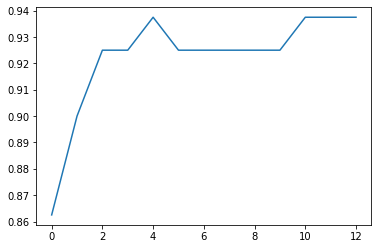

In [61]:
plt.plot(range(len(accuracy)), [x for x in accuracy])

In [62]:
max(accuracy)

0.9375

In [63]:
accuracy.index(max(accuracy))

4

In [64]:
model = KNeighborsClassifier(n_neighbors=k_nn[4])

In [65]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [74]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 1 0 0]


In [75]:
accuracy_score(y_test, y_pred)

0.9375

## Creating Output Function 

In [84]:

def predict_output():
    age = float(input("enter the age: "))
    salary = float(input("enter the salary: "))
    X_new = np.array([[age], [salary]]).reshape(1,2)
    X_new = scaler.transform(X_new)
    
    if model.predict(X_new)[0] == 0:
        return "Will not Purchase"
    else:
        return "Will Purchase"

### Testing model According to User input

In [86]:
predict_output()

enter the age: 34
enter the salary: 56000


'Will not Purchase'

In [87]:
predict_output()

enter the age: 30
enter the salary: 200000


'Will Purchase'